<a href="https://colab.research.google.com/github/dataduran/public/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictor S&P - Xarxes neuronals

In [ ]:
#Descripció: aquest programa utilitza xarxes neurals artificials recurrents anomenades "long short term memory" (LSTM)
# fem la predicció de l'index (S&P) utilitzant els últims 60 dies.

In [1]:
# import the libraries
import math
import datetime
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
today = datetime.date.today()
print(today)

2021-11-23


In [3]:
# get the stock quote
df = web.DataReader('^SPX', data_source='stooq' , start='2010-09-10', end= today )
df = df.iloc[::-1]
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-09-10,1104.57,1110.88,1103.92,1109.55,1700644444
2010-09-13,1113.38,1123.87,1113.38,1121.90,2511694444
2010-09-14,1121.16,1127.36,1115.58,1121.10,2511694444
2010-09-15,1119.43,1126.46,1114.63,1125.07,1872133333
2010-09-16,1123.89,1125.44,1118.88,1124.66,1868933333
...,...,...,...,...,...
2021-11-16,4679.42,4714.95,4679.42,4700.90,1969710437
2021-11-17,4701.50,4701.50,4684.41,4688.67,2073793765
2021-11-18,4700.72,4708.80,4672.78,4704.54,2229419489


In [ ]:
df.shape

(2816, 5)

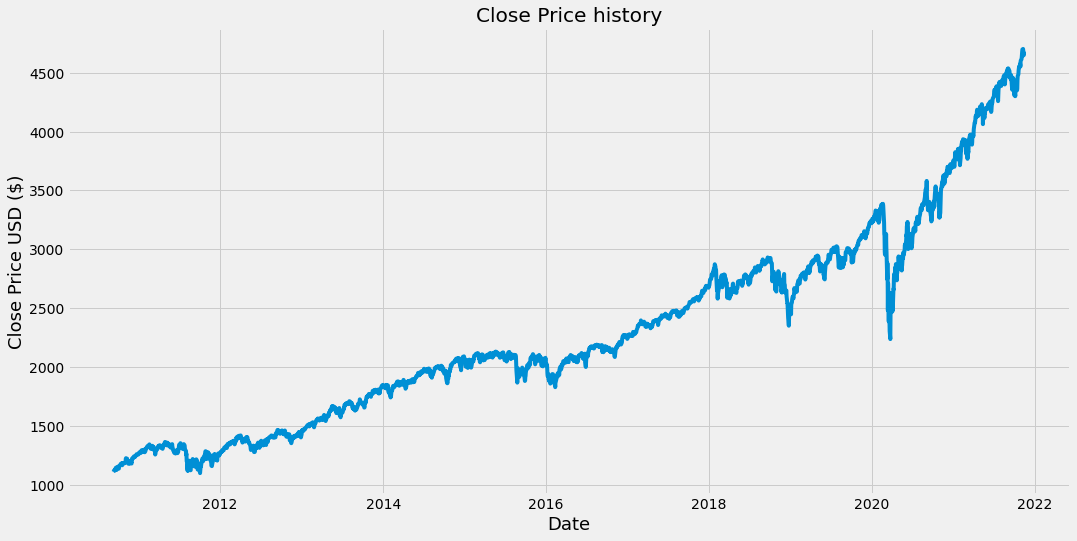

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.show()

In [ ]:
#create new dataframe with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2253

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0028647 ],
       [0.0062929 ],
       [0.00607083],
       ...,
       [0.9854461 ],
       [0.99476748],
       [0.9947536 ]])

In [ ]:
#create training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0028647 , 0.0062929 , 0.00607083, 0.00717286, 0.00705905,
       0.0073172 , 0.0120695 , 0.01125617, 0.00972944, 0.00710624,
       0.01372392, 0.01191682, 0.01345466, 0.01263022, 0.01165034,
       0.01304938, 0.0104928 , 0.01707717, 0.01686065, 0.01633046,
       0.01829856, 0.01834575, 0.01958101, 0.02189331, 0.02070246,
       0.02136312, 0.02372816, 0.01850675, 0.02191274, 0.0224929 ,
       0.0232757 , 0.02398077, 0.02398632, 0.02310082, 0.02347001,
       0.02332566, 0.02363656, 0.02618759, 0.0274062 , 0.03381846,
       0.03514811, 0.03442638, 0.03169214, 0.03316613, 0.03173101,
       0.02775318, 0.0273479 , 0.02195993, 0.02202933, 0.02705366,
       0.02789753, 0.02737289, 0.02262337, 0.02751446, 0.02503005,
       0.02457481, 0.0225734 , 0.02965743, 0.03394893, 0.03483166])]
[0.03439029332652316]

[array([0.0028647 , 0.0062929 , 0.00607083, 0.00717286, 0.00705905,
       0.0073172 , 0.0120695 , 0.01125617, 0.00972944, 0.00710624,
       0.01372392, 0.01191682, 0.01

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2193, 60, 1)

In [ ]:
#built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2193/2193 [==============================] - 62s 27ms/step - loss: 3.5175e-04


In [ ]:
#create the testing data set
#create a new array containing scaled valuesd from index 2253 to 2816
test_data = scaled_data[training_data_len - 60: , : ]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [ ]:
#convert the data to a numpy array
x_test =np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

80.10408983681171

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


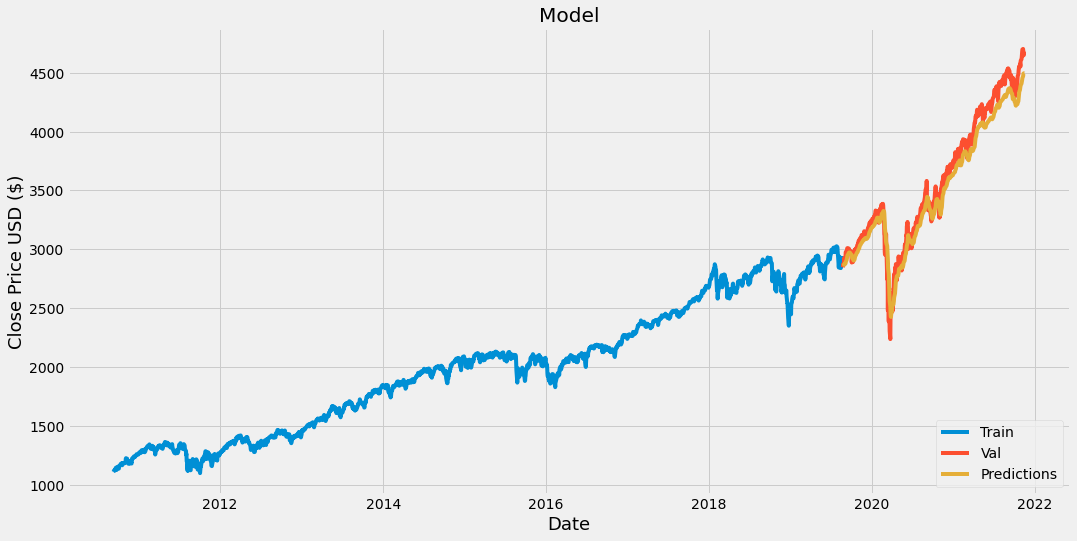

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-08-23,2847.11,2883.120850
2019-08-26,2878.38,2879.343994
2019-08-27,2869.16,2875.289062
2019-08-28,2887.94,2870.275879
2019-08-29,2924.58,2867.614014
...,...,...
2021-11-09,4685.25,4483.261230
2021-11-10,4646.71,4492.780273
2021-11-11,4649.27,4494.415527


In [ ]:
#get the quote
sp_quote= web.DataReader('^SPX', data_source='stooq' , start='2010-09-10', end= today )
sp_quote = sp_quote.iloc[::-1]
#create new dataframe
new_df= sp_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[4495.719]]


In [ ]:
#get the quote
sp_quote2= web.DataReader('^SPX', data_source='stooq' , start='2021-11-16', end='2021-11-16' )
print(sp_quote2['Close'])

Date
2021-11-16    4700.9
Name: Close, dtype: float64
